In [2]:
#import keras library
import keras
#import ImageDataGenerator class from keras
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Define the parameters /arguments for ImageDataGenerator class
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
#: Applying ImageDataGenerator functionality to trainset.
#give the path of training images folder
x_train = train_datagen.flow_from_directory(r'E:\Guided Projects Github\Detecting-Forest-Combustion-in-Forests-main\Dataset\train_set',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 436 images belonging to 2 classes.


In [5]:
#: Applying ImageDataGenerator functionality to testset.
#give the path of testing images folder
x_test = test_datagen.flow_from_directory(r'E:\Guided Projects Github\Detecting-Forest-Combustion-in-Forests-main\Dataset\test_set',
                                          target_size = (128,128),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 121 images belonging to 2 classes.


In [8]:
'''import model building libraries'''

#To define linear intialisation import Sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [9]:
#intializing the model
model =Sequential()

In [10]:
#add convolutional layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [11]:
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
#add flatten layer
model.add(Flatten())

In [15]:
#add hidden layer
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))

In [ ]:
#add hidden layermodel.add(Dense(output_dim=64,init='uniform',activation='relu'))

In [16]:
#add output layer
model.add(Dense(kernel_initializer='uniform',activation='sigmoid',units=1))

In [17]:
#to check the indices
print(x_train.class_indices)

{'forest': 0, 'with fire': 1}


In [18]:
#configure the learning process
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [19]:
#Training the model
model.fit_generator(x_train,steps_per_epoch=14,
                    epochs=10,validation_data=x_test,
                    validation_steps=4)

Epoch 1/10
14/14 [==============================] - 137s 5s/step - loss: 1.0225 - accuracy: 0.6418 - val_loss: 0.3460 - val_accuracy: 0.8264
Epoch 2/10
14/14 [==============================] - 68s 5s/step - loss: 0.4223 - accuracy: 0.7661 - val_loss: 0.2252 - val_accuracy: 0.8760
Epoch 3/10
14/14 [==============================] - 56s 4s/step - loss: 0.2331 - accuracy: 0.8830 - val_loss: 0.1306 - val_accuracy: 0.9421
Epoch 4/10
14/14 [==============================] - 43s 3s/step - loss: 0.2318 - accuracy: 0.9075 - val_loss: 0.0842 - val_accuracy: 0.9752
Epoch 5/10
14/14 [==============================] - 40s 3s/step - loss: 0.1843 - accuracy: 0.9201 - val_loss: 0.1211 - val_accuracy: 0.9421
Epoch 6/10
14/14 [==============================] - 37s 3s/step - loss: 0.2264 - accuracy: 0.8964 - val_loss: 0.0738 - val_accuracy: 0.9835
Epoch 7/10
14/14 [==============================] - 37s 3s/step - loss: 0.1564 - accuracy: 0.9459 - val_loss: 0.0717 - val_accuracy: 0.9835
Epoch 8/10
14/14 [=

In [20]:
#save the model
model.save("forest1.h5")

# Prediction

In [1]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
from keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [2]:
#load the saved model
model = load_model("forest1.h5")

In [3]:
#give any random image path
img = image.load_img(r'E:\Guided Projects Github\Detecting-Forest-Combustion-in-Forests-main\Dataset\train_set\forest\with_fire (1).gif',target_size = (128,128))
x = image.img_to_array(img)
#expand the image shape
x = np.expand_dims(x,axis = 0)

In [4]:
pred = model.predict_classes(x)

C:\Users\shubh\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [5]:
pred

array([[0]])

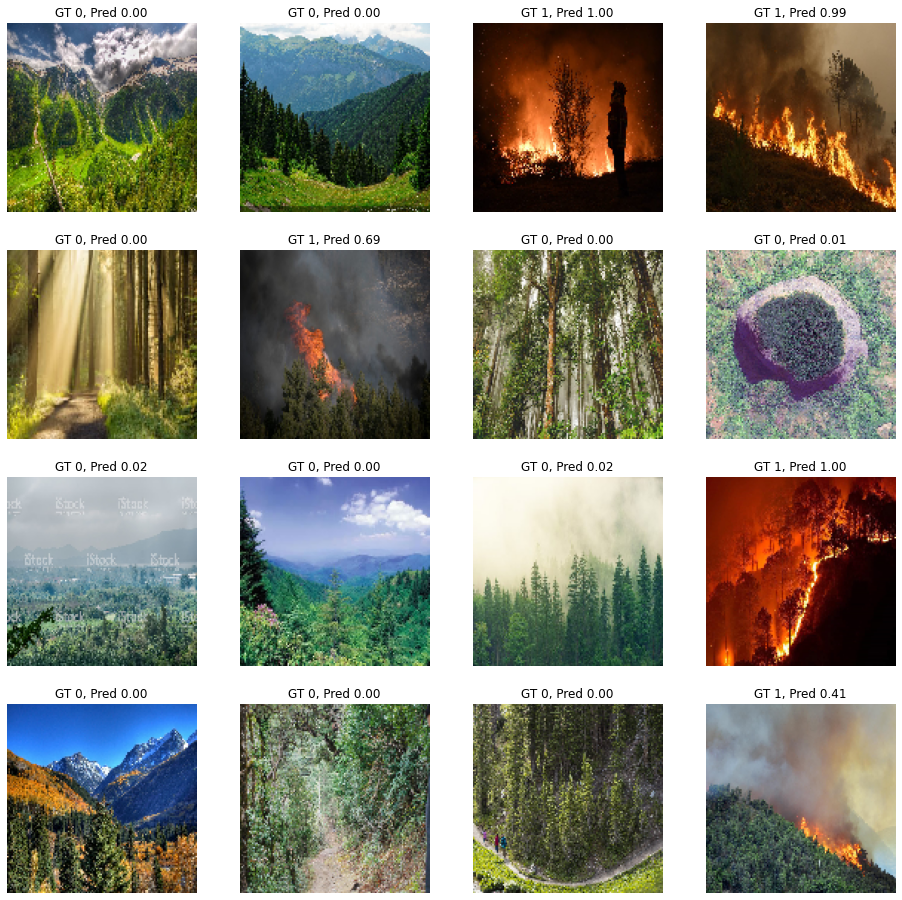

In [32]:
import matplotlib.pyplot as plt

val_imgs, val_labels = x_test.__getitem__(0)

preds = model.predict(val_imgs)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for img, label, pred, ax in zip(val_imgs, val_labels, preds, axes.flatten()):
    ax.imshow(img)
    ax.set_title('GT %d, Pred %.2f' % (label, pred))
    ax.set_axis_off()

# opencv prediction

In [1]:
cv2.__version__

NameError: name 'cv2' is not defined

In [ ]:
import cv2
#import facevec
import numpy as np
import smtplib
from keras.preprocessing import image 
from keras.models  import load_model
from twilio.rest import Client

model = load_model(r'forest1.h5') 
video = cv2.VideoCapture(0)
name = ['forest','with fire']
    
while(1):
    success, frame = video.read()
    cv2.imwrite("1.jpg",frame)
    img = image.load_img("1.jpg",target_size = (128,128,3))
    x  = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    pred = model.predict_classes(x)
    p = pred[0][0]
    print(pred)
    cv2.putText(frame, np.array(x_train)[indices.astype(int)])
    #out_images = np.array(X_train)[indices.astype(int)]
    
    pred = model.predict_classes(x)
    if pred[0]==1:
        account_sid = 'AC7cf10e025b98efe6b43870aec9660062'
        auth_token = '6face7a62a524d2072ef605842feabb5'
        client = Client(account_sid, auth_token)

        message = client.messages \
        .create(
         body='Forest Fire is detected, stay alert',
         from_=' +12183220515', #twilio free number
         to='+919302455750')
        print(message.sid)
    
        print('Fire Detected')
        print ('SMS sent!')
        break
    else:
        print("no danger")
       #break
    cv2.imshow("image",frame)
   
    if cv2.waitKey(1) & 0xFF == ord('a'): 
        break

video.release()
cv2.destroyAllWindows()

C:\Users\shubh\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1]]
